To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [17]:
#install packages if required
#%pip install networkx

In [18]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [19]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [20]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['Berlin-Tiergarten']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [21]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/Berlin/pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [22]:
cities_dict = make_dict(cities)
cities_dict

{'Berlin-Tiergarten': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Tiergarten/Berlin-Tiergarten_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Tiergarten/Berlin-Tiergarten_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Tiergarten/Berlin-Tiergarten_trips.tntp.txt'}}}

# instantiate class

In [23]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [24]:
#set city for investigation
city = cities[0]

In [25]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,170,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,269,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,329,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,348,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,204,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
761,360,119,2800.0,41.0,5.333333,1.0,4.0,0.0,0.0,1
762,360,132,2800.0,27.0,2.000000,1.0,4.0,0.0,0.0,1
763,361,34,600.0,327.0,12.333333,1.0,4.0,0.0,0.0,1
764,361,43,2800.0,363.0,14.000000,1.0,4.0,0.0,0.0,1


# Plot graph

Total number of nodes in Berlin-Tiergarten: 359
Total number of edges in Berlin-Tiergarten: 766
Graph for: Berlin-Tiergarten


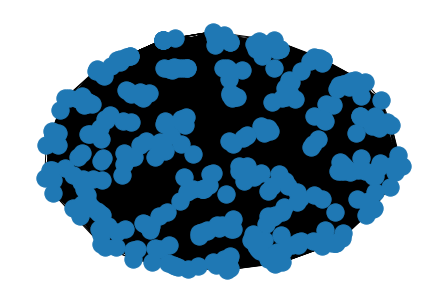

In [26]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [27]:
#observe network with all links
remove_link = None #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

No links removed
Berlin-Tiergarten graph is: DiGraph with 359 nodes and 766 edges
Berlin-Tiergarten origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']
Berlin-Tiergarten flows are: {('1', '2'): 22.59, ('1', '3'): 18.32, ('1', '4'): 21.82, ('1', '5'): 15.22, ('1', '6'): 3.73, ('1', '7'): 0.1, ('1', '8'): 0.31, ('1', '9'): 1.22, ('1', '10'): 0.52, ('1', '11'): 0.21, ('1', '12'): 1.52, ('1', '13'): 11.19, ('1', '14'): 19.89, ('1', '15'): 19.45, ('1', '16'): 11.08, ('1', '17'): 19.53, ('1', '18'): 0.46, ('1', '19'): 0.13, ('1', '20'): 10.2, ('1', '21'): 12.93, ('1', '22'): 12.04, ('1', '23'): 10.91, ('1', '24'): 0.03, ('1', '25'): 0.49, ('1', '26'): 3.68, ('2', '1'): 22.5, ('2', '3'): 41.82, ('2', '4'): 86.27, ('2', '5'): 43.27, ('2', '6'): 38.19, ('2', '7'): 3.04, ('2', '8'): 2.14, ('2', '9'): 4.8, ('2', '10'): 4.47, ('2', '11'): 1.17, ('2', '12'): 9.07, ('2', '13'): 17.68, ('

In [28]:
#observe network after removing one link
remove_link = 1
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

Berlin-Tiergarten graph is: DiGraph with 359 nodes and 765 edges
Berlin-Tiergarten origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']
Berlin-Tiergarten flows are: {('1', '2'): 22.59, ('1', '3'): 18.32, ('1', '4'): 21.82, ('1', '5'): 15.22, ('1', '6'): 3.73, ('1', '7'): 0.1, ('1', '8'): 0.31, ('1', '9'): 1.22, ('1', '10'): 0.52, ('1', '11'): 0.21, ('1', '12'): 1.52, ('1', '13'): 11.19, ('1', '14'): 19.89, ('1', '15'): 19.45, ('1', '16'): 11.08, ('1', '17'): 19.53, ('1', '18'): 0.46, ('1', '19'): 0.13, ('1', '20'): 10.2, ('1', '21'): 12.93, ('1', '22'): 12.04, ('1', '23'): 10.91, ('1', '24'): 0.03, ('1', '25'): 0.49, ('1', '26'): 3.68, ('2', '1'): 22.5, ('2', '3'): 41.82, ('2', '4'): 86.27, ('2', '5'): 43.27, ('2', '6'): 38.19, ('2', '7'): 3.04, ('2', '8'): 2.14, ('2', '9'): 4.8, ('2', '10'): 4.47, ('2', '11'): 1.17, ('2', '12'): 9.07, ('2', '13'): 17.68, ('2', '14'): 47.42,

# Compute equilibrium flow for complete graph using Frank-Wolfe algorithm

In [ ]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = None
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
check = list(cities_dict[city].keys())
check.remove('file_paths')
check.remove('csv')
print(check)
for i in check:
    if cities_dict[city]['csv'].shape[0] <= len(cities_dict[city][i]['network'].graph.edges):
        print(True)
#should only print one True i.e. only one full network - 'None'

In [ ]:
%%time

trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

# Save file

In [ ]:
save_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/results/'
Berlin_Tiergarten_Center = cities_dict
with open('Berlin_Tiergarten_Center.pickle', 'wb') as handle:
    pickle.dump(Berlin_Tiergarten_Center, handle, protocol=pickle.HIGHEST_PROTOCOL)